# Explore here

In [10]:
import pandas as pd

dataset_seg = []
dataset_seg = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
dataset_seg.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
dataset_seg.shape

(1338, 7)

In [12]:
dataset_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
display(dataset_seg.describe(include="object").T)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [14]:
display(dataset_seg.describe(include="number").T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Existe un total de 1338 filas y 7 columnas, de entre las que encontramos el objetivo o clase a predecir, charge.
No existen valores nulos. 
Los datos cuentan con 4 características numéricas y 3 características categóricas.

In [15]:
dataset_seg.drop(["region"], axis=1, inplace=True)
dataset_seg.sample(10)

,age,sex,bmi,children,smoker,charges
850,37,female,30.780,0,yes,37270.15120
1155,36,female,22.135,3,no,7228.21565
697,41,male,35.750,1,yes,40273.64550
728,18,female,40.280,0,no,2217.60120
153,42,female,23.370,0,yes,19964.74630
1,18,male,33.770,1,no,1725.55230
834,36,male,33.820,1,no,5377.45780
418,64,male,39.160,1,no,14418.28040
1067,39,male,42.655,0,no,5757.41345
884,25,male,26.695,4,no,4877.98105


In [16]:
dataset_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


ANALISIS UNIVARIANTE
Variables Categoricas

In [17]:
display(dataset_seg.describe(include="object").T)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064


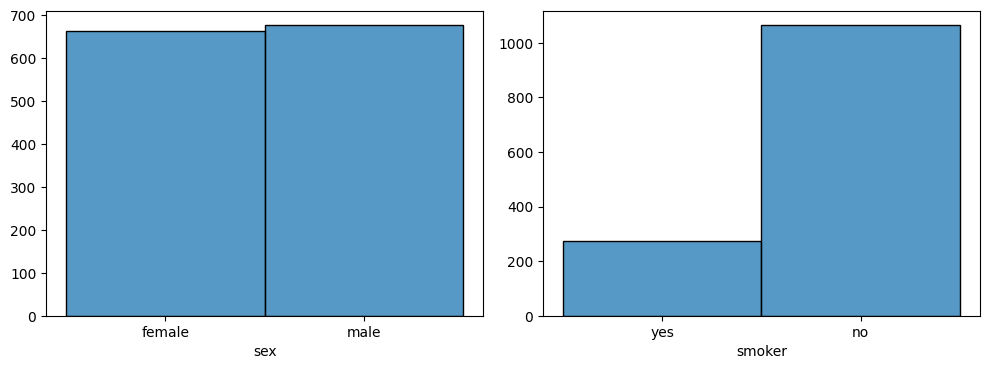

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(ax=axis[0, 0], data=dataset_seg, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=dataset_seg, x="smoker").set(ylabel=None)
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

En cuanto a la evaluacion de genero presentan valores similares. La poblacion de fumadores existe una gran diferencia entre fumadores y no fumadores siendo la gran mayoria no fumadores

Variables Numericas

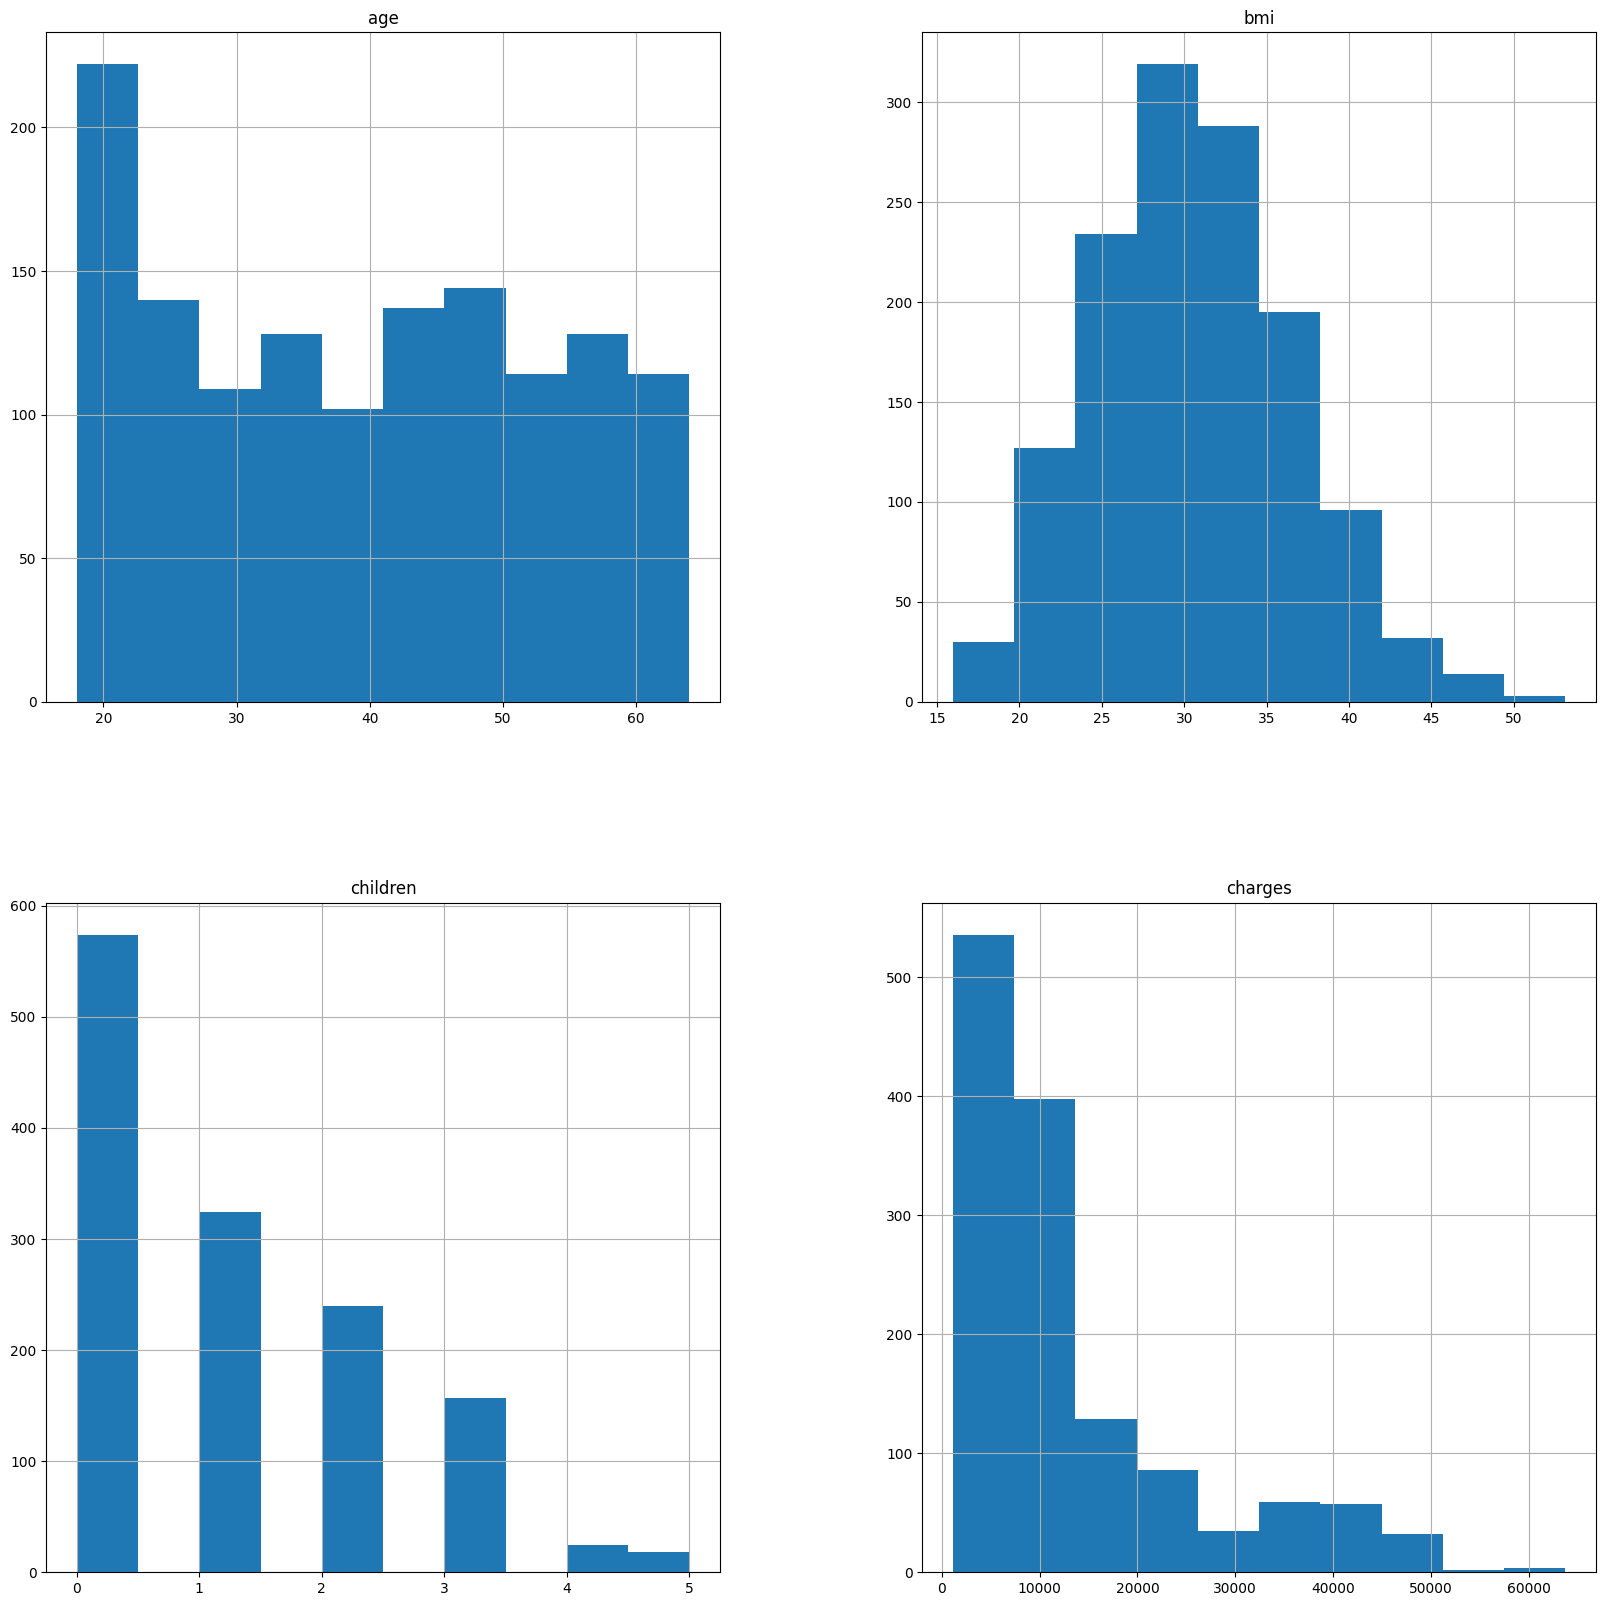

In [19]:
import matplotlib.pyplot as plt
dataset_seg.hist(figsize=(20,20))
plt.show()

En cuanto a la variable edad la mayor poblacion esta concentrada entre 20 y 25 años, siendo constante hasta los 60 años. El indice de masa corporal esta mas concentrado entre los valores de 25 y 35 bajando gradualmente a la izquierda y derecha respectivamente. La mayoria de la poblacion no tiene hijos y la cantidad va endescendo de 1 a 5. En cuanto a la prima del seguro medico esta mayormente concentrado entre 100 y 800.

Análisis de variables multivariante
Análisis numérico-numérico

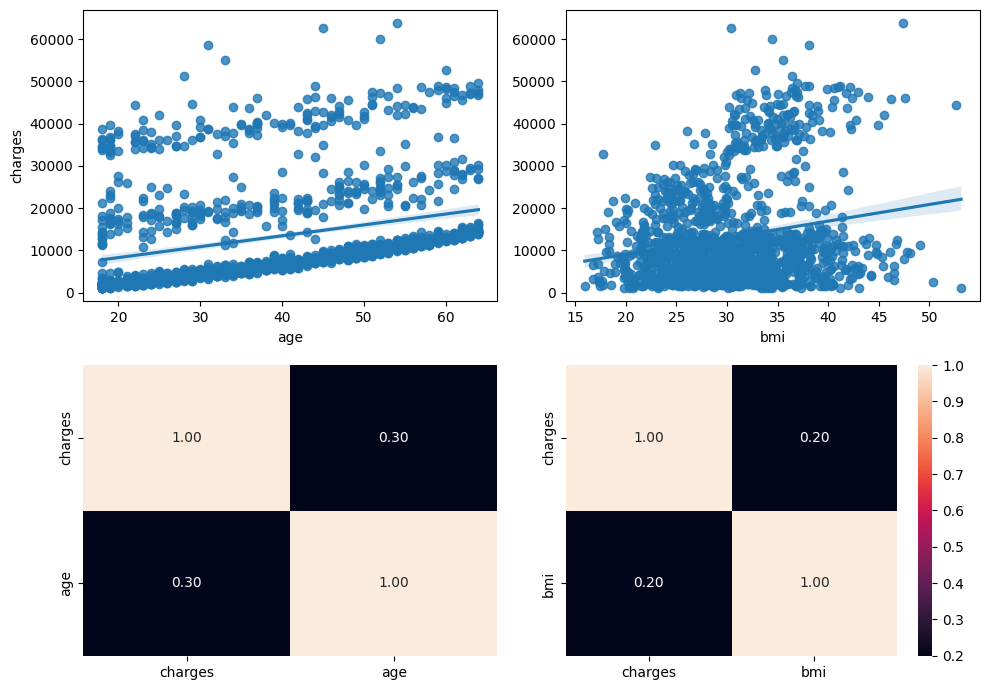

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset_seg, x = "age", y = "charges")
sns.heatmap(dataset_seg[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset_seg, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(dataset_seg[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Charges/age: correlacion directa positiva con un coeficiente de 0.30
Charges/bmi: correlacion directa positiva con un coeficiente de 0.20

Análisis categórico-categórico

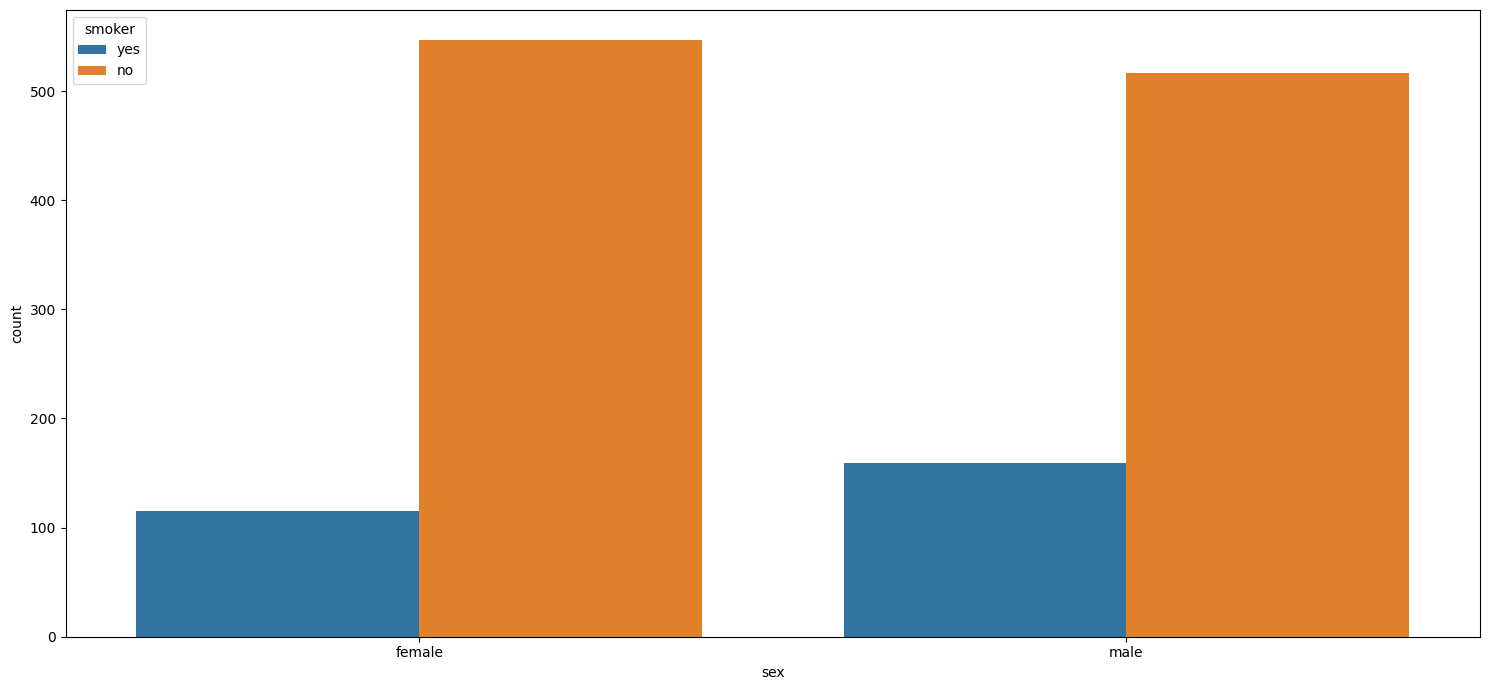

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 1, figsize=(15, 7))

sns.countplot(ax=axis, data=dataset_seg, x="sex", hue="smoker")


plt.tight_layout()

plt.show()


Tanto hombres como mujeres hay mayor poblacion de NO fumadores.

Análisis de correlaciones

In [22]:
dataset_seg.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


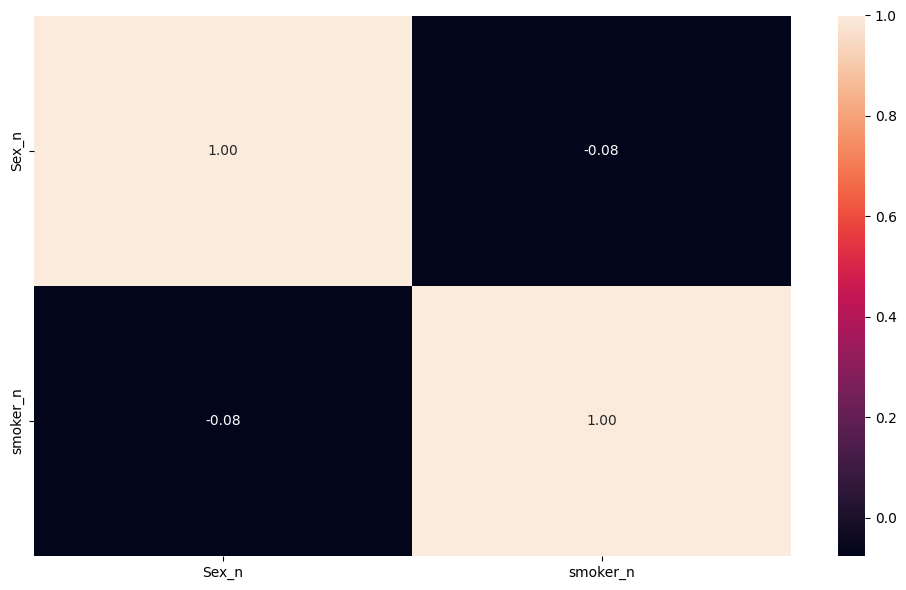

In [23]:
dataset_seg["Sex_n"] = pd.factorize(dataset_seg["sex"])[0]
dataset_seg["smoker_n"] = pd.factorize(dataset_seg["smoker"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataset_seg[["Sex_n", "smoker_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Sex_n/smoker_n: correlacion baja negativa.

Análisis numérico-categórico (completo)

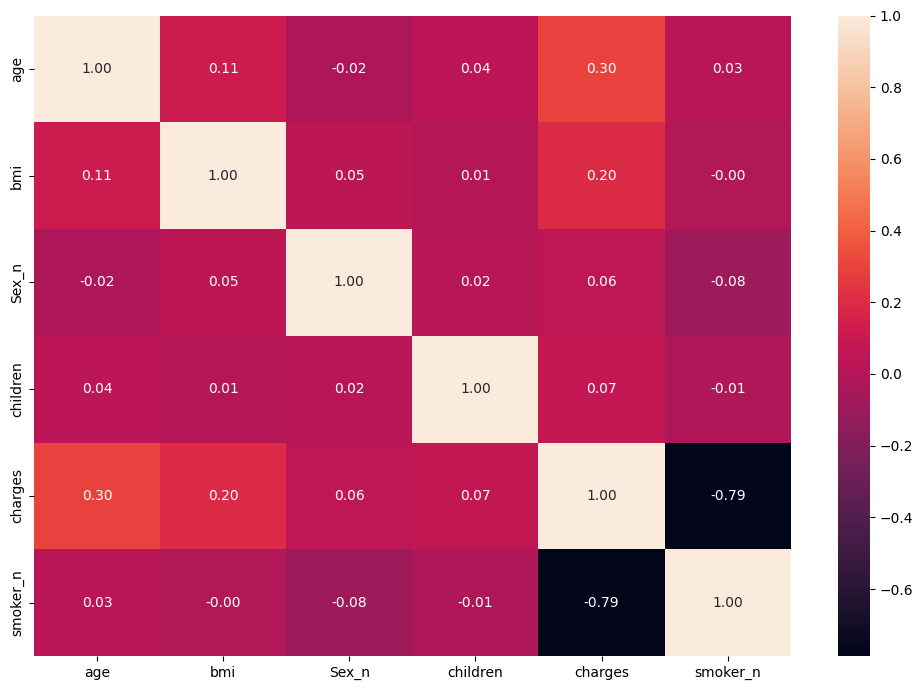

In [24]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(dataset_seg[["age", "bmi", "Sex_n", "children", "charges", "smoker_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

smoker_n/charges: correlacion alta de tipo negativa con un coeficiente de -0.79
charges/bmi: correlacion media de tipo positiva con un coeficiente de 0.20
El resto de las correlaciones no aportan valores significativos al analisis

Ingeniería de características

In [25]:
dataset_seg.describe()

,age,bmi,children,charges,Sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


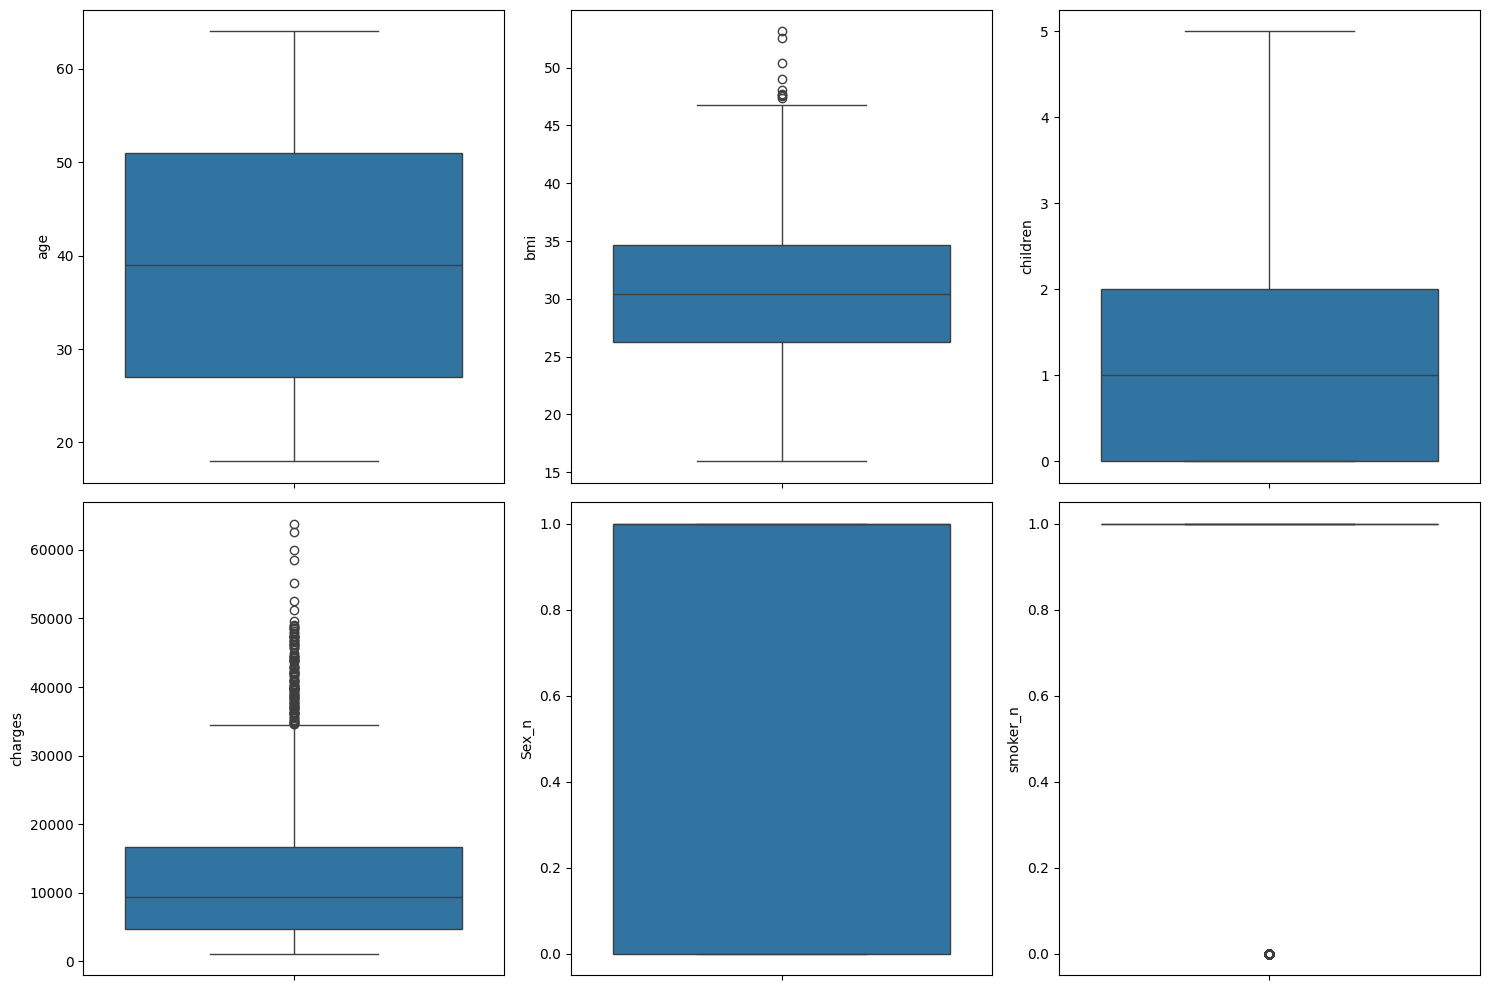

In [26]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataset_seg, y = "age")
sns.boxplot(ax = axis[0, 1], data = dataset_seg, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = dataset_seg, y = "children")
sns.boxplot(ax = axis[1, 0], data = dataset_seg, y = "charges")
sns.boxplot(ax = axis[1, 1], data = dataset_seg, y = "Sex_n")
sns.boxplot(ax = axis[1, 2], data = dataset_seg, y = "smoker_n")


plt.tight_layout()

plt.show()